In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
dfQ32024 = pd.read_csv('Copy of RD&D Scorecard Feedback 2023-2024 Raw Data - Q3 - 2024.csv')
dfQ32024

,Candidate Name,Job,Requisition ID,Department,Current Status,Stage,Interview,Scheduled,Submitted,Interviewer,Outcome
0,Pedro Zenone,Senior Data Scientist LATAM,Evergreen - Senior Data Scientist LATAM,Data,Rejected,Panel Team Interview,Take-Home Presentation w/ Emily,08/26/2024,09/02/2024,Adi Kedia,Yes
1,Joaquin Tempelsman,Senior Data Scientist LATAM,Evergreen - Senior Data Scientist LATAM,Data,Hired,Panel Team Interview,Take-Home Presentation w/ Emily,08/30/2024,09/03/2024,Adi Kedia,Yes
2,Gastón Ortiz,Senior Data Scientist LATAM,Evergreen - Senior Data Scientist LATAM,Data,Rejected,Panel Team Interview,Take-Home Presentation w/ Emily,09/11/2024,09/17/2024,Adi Kedia,No
3,Malena Maffei,Senior Data Scientist LATAM,Evergreen - Senior Data Scientist LATAM,Data,Hired,Panel Team Interview,Take-Home Presentation w/ Emily,09/20/2024,09/20/2024,Adi Kedia,Strong Yes
4,Matías Miranda,Senior Data Scientist LATAM,Evergreen - Senior Data Scientist LATAM,Data,Rejected,Panel Team Interview,Take-Home Presentation w/ Emily,09/23/2024,09/24/2024,Adi Kedia,Yes
...,...,...,...,...,...,...,...,...,...,...,...
348,Darwis Narvaez,Software Engineer (Integrity) - LATAM,BHC3290,TechOps,Active,Panel Team Interview,60 min - Systems Design,09/26/2024,09/26/2024,Xavier Rigau,Yes
349,Joaquin Tempelsman,Senior Data Scientist LATAM,Evergreen - Senior Data Scientist LATAM,Data,Hired,Panel Team Interview,Team/Fit Culture w/ Yael,08/26/2024,08/26/2024,Yael Stolberg Saam,Yes
350,Santiago Amena,Senior Data Scientist LATAM,Evergreen - Senior Data Scientist LATAM,Data,Rejected,Panel Team Interview,Team/Fit Culture w/ Yael,08/28/2024,08/30/2024,Yael Stolberg Saam,No
351,Gastón Ortiz,Senior Data Scientist LATAM,Evergreen - Senior Data Scientist LATAM,Data,Rejected,Panel Team Interview,Team/Fit Culture w/ Yael,09/16/2024,09/16/2024,Yael Stolberg Saam,Strong Yes


/var/folders/5n/nhlty2pd5q96xfw8z_1stsnm0000gn/T/ipykernel_78278/1515706515.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=interviews_by_month.index.strftime('%Y-%m'), y=interviews_by_month.values, palette='viridis')


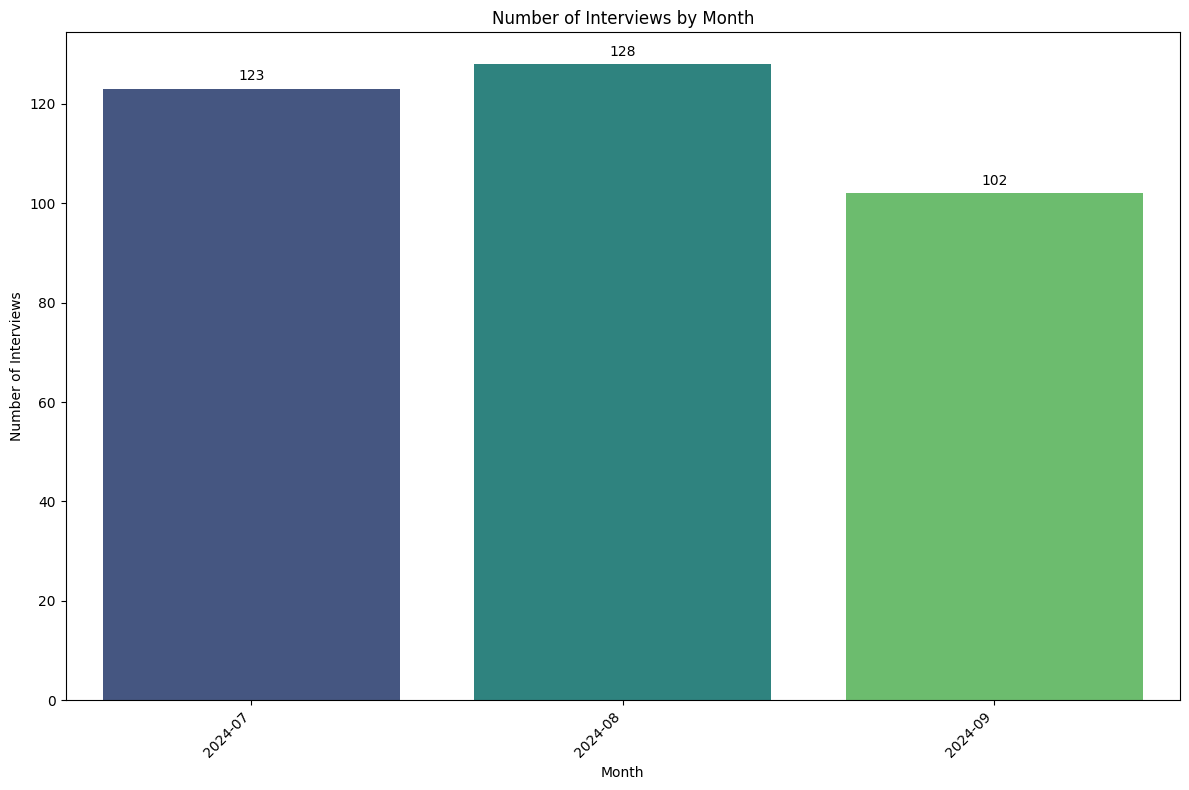

In [28]:
# Crear un gráfico de barras para visualizar la cantidad de entrevistas por mes
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=interviews_by_month.index.strftime('%Y-%m'), y=interviews_by_month.values, palette='viridis')
plt.title("Number of Interviews by Month")
plt.xlabel("Month")
plt.ylabel("Number of Interviews")
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas con la cantidad exacta de entrevistas
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

/var/folders/5n/nhlty2pd5q96xfw8z_1stsnm0000gn/T/ipykernel_78278/3325938422.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=interviews_by_stage.index, y=interviews_by_stage.values, palette='viridis')


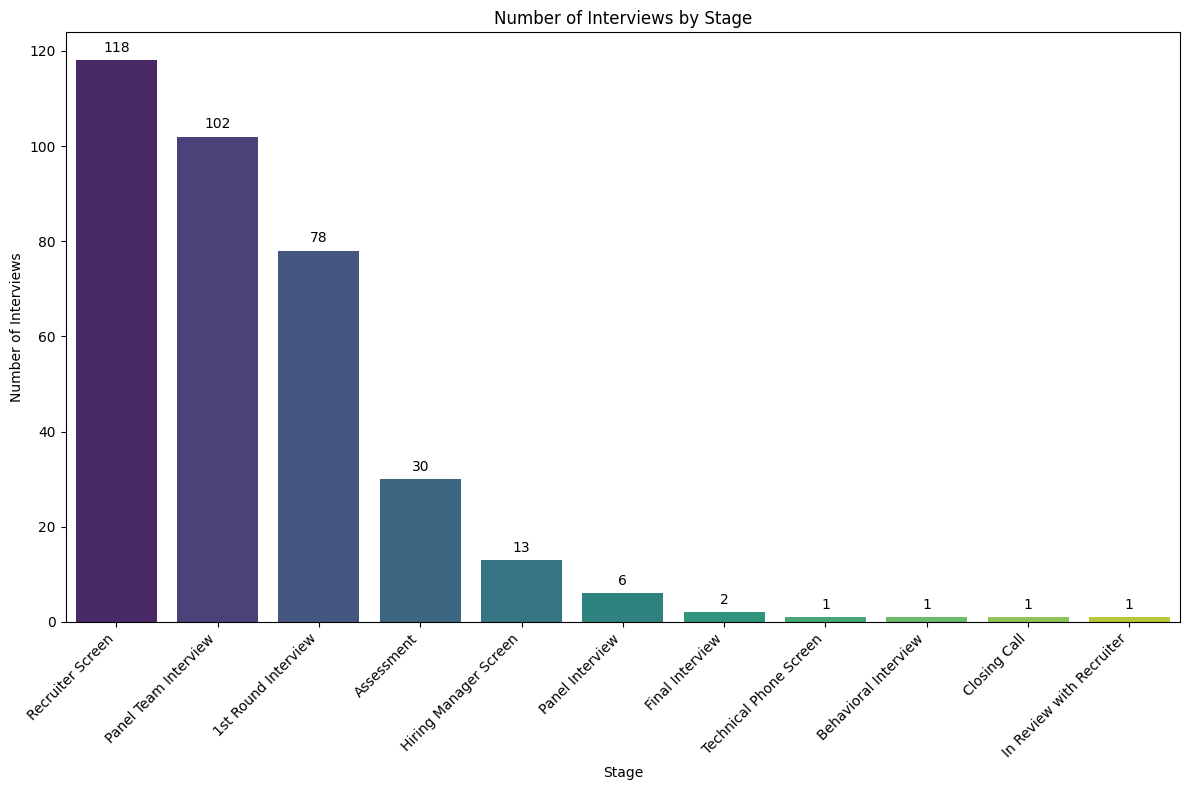

In [3]:
interviews_by_stage = dfQ32024["Stage"].value_counts()
interviews_by_stage
# Crear un gráfico de barras para visualizar la cantidad de entrevistas por etapa
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=interviews_by_stage.index, y=interviews_by_stage.values, palette='viridis')
plt.title("Number of Interviews by Stage")
plt.xlabel("Stage")
plt.ylabel("Number of Interviews")
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas con la cantidad exacta de entrevistas
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [4]:
# Calcular la cantidad de entrevistas por entrevistador y trabajo
interviews_by_interviewer_and_job = dfQ32024.groupby(['Interviewer', 'Job']).size().reset_index(name='Interview Count')

# Mostrar los resultados
print(interviews_by_interviewer_and_job)

           Interviewer                                           Job  \
0            Adi Kedia                   Senior Data Scientist LATAM   
1         Alain Nguyen  Senior Software Engineer (Integrity) - LATAM   
2    Alejandro Attento                   Senior Data Scientist LATAM   
3           Alex Miley                     Senior Frontend Engineer    
4    Andrew De Stefano                    Senior Data Engineer LATAM   
..                 ...                                           ...   
58         Sean Paxman                    Senior Data Engineer LATAM   
59          Vic Porter   Senior Backend Engineer (Incubation)- LATAM   
60       Victoria Kieu  Senior Software Engineer (Integrity) - LATAM   
61        Xavier Rigau         Software Engineer (Integrity) - LATAM   
62  Yael Stolberg Saam                   Senior Data Scientist LATAM   

    Interview Count  
0                 6  
1                 1  
2                 8  
3                 3  
4                 4  
.. 

/var/folders/5n/nhlty2pd5q96xfw8z_1stsnm0000gn/T/ipykernel_78278/657180509.py:2: FutureWarning: The provided callable <function sum at 0x105ffbe20> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = interviews_by_interviewer_and_job.pivot_table(


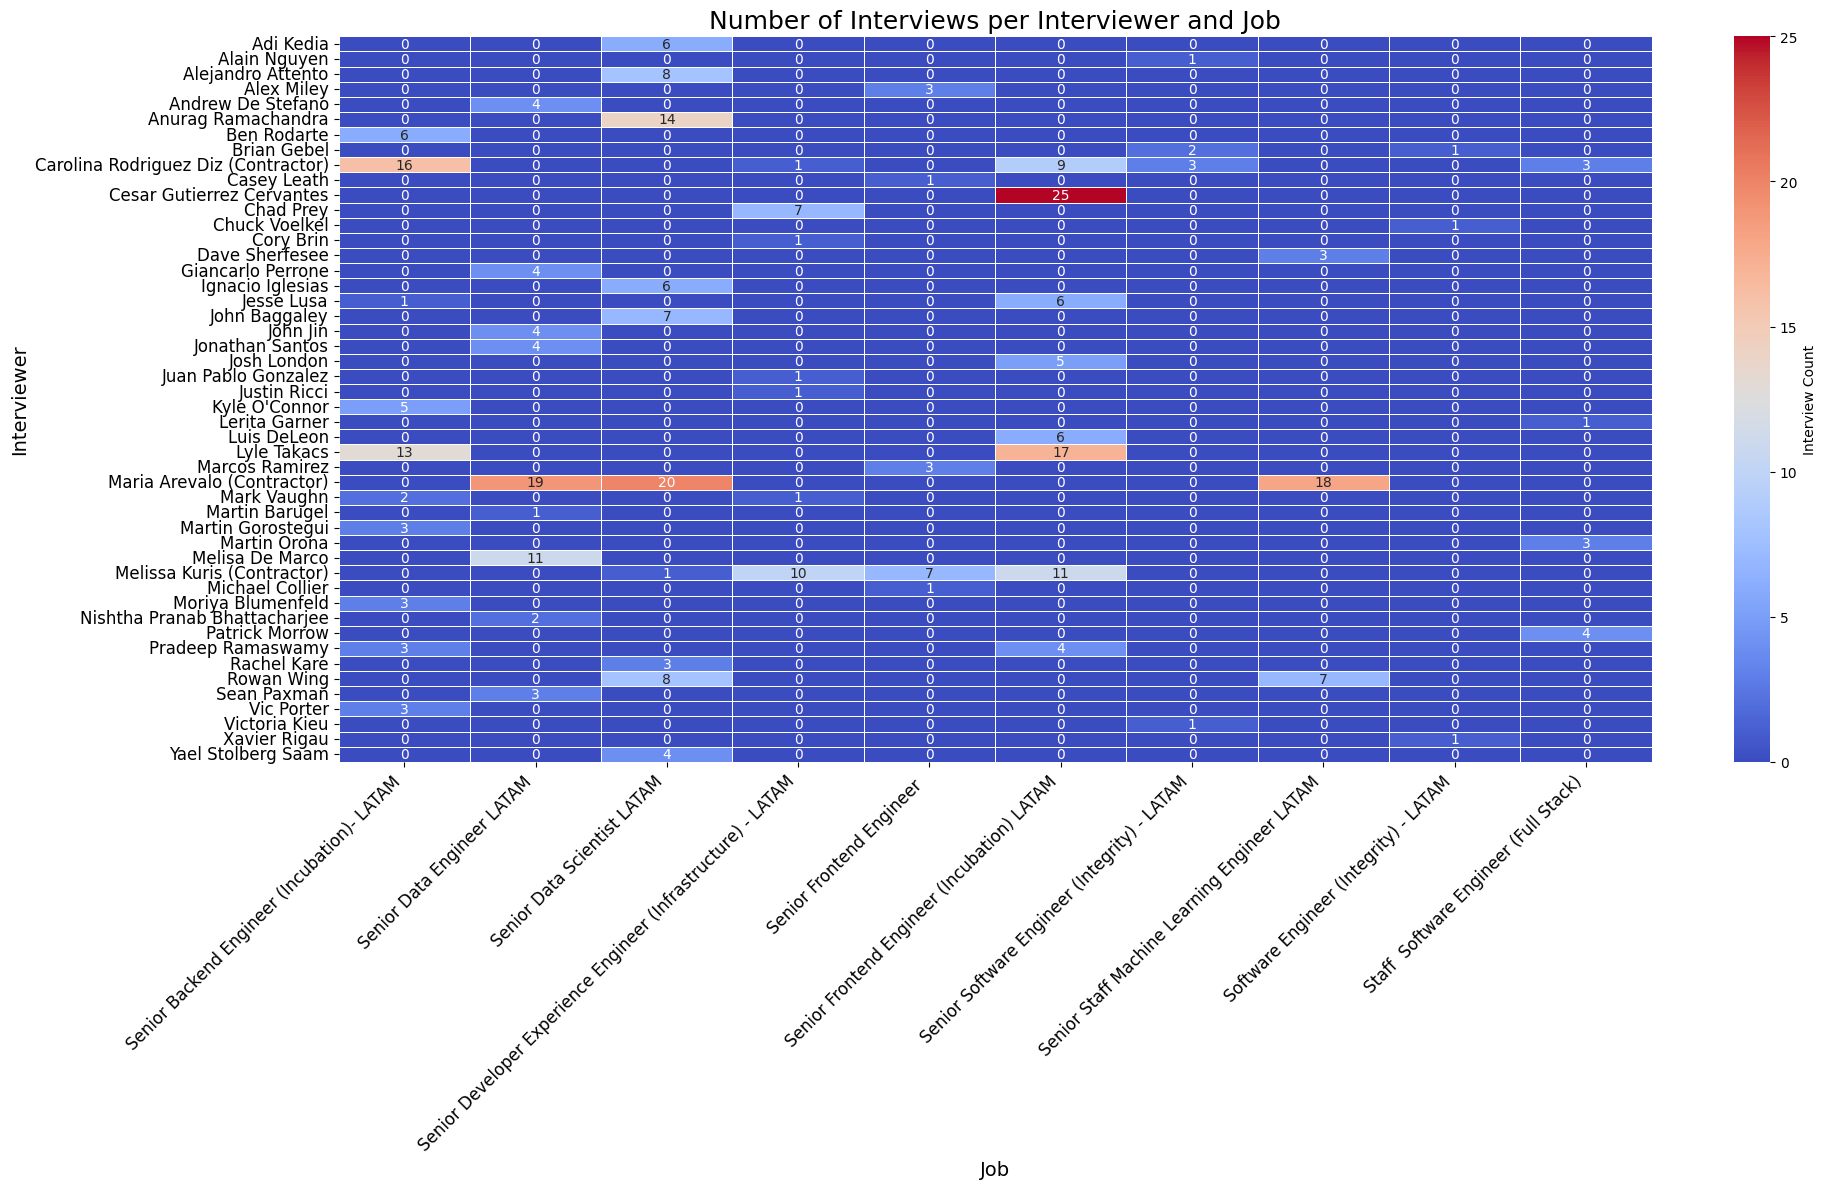

In [6]:
# Crear un gráfico de calor para visualizar las entrevistas por entrevistador y trabajo
pivot_table = interviews_by_interviewer_and_job.pivot_table(
    values='Interview Count', 
    index='Interviewer', 
    columns='Job', 
    aggfunc=np.sum, 
    fill_value=0
)

# Configuración del gráfico
plt.figure(figsize=(20, 12))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Interview Count'})
plt.title("Number of Interviews per Interviewer and Job", fontsize=18)
plt.xlabel("Job", fontsize=14)
plt.ylabel("Interviewer", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [7]:
# Calcular el total de entrevistas por entrevistador
total_interviews_by_interviewer = dfQ32024['Interviewer'].value_counts().reset_index()
total_interviews_by_interviewer.columns = ['Interviewer', 'Total Interviews']

# Calcular el total de entrevistas
total_interviews = total_interviews_by_interviewer['Total Interviews'].sum()

# Crear una tabla más atractiva
print(tabulate(total_interviews_by_interviewer, headers='keys', tablefmt='fancy_grid'))
print(f"\nTotal Interviews: {total_interviews}")

╒════╤═════════════════════════════════════╤════════════════════╕
│    │ Interviewer                         │   Total Interviews │
╞════╪═════════════════════════════════════╪════════════════════╡
│  0 │ Maria Arevalo (Contractor)          │                 57 │
├────┼─────────────────────────────────────┼────────────────────┤
│  1 │ Carolina Rodriguez Diz (Contractor) │                 32 │
├────┼─────────────────────────────────────┼────────────────────┤
│  2 │ Lyle Takacs                         │                 30 │
├────┼─────────────────────────────────────┼────────────────────┤
│  3 │ Melissa Kuris (Contractor)          │                 29 │
├────┼─────────────────────────────────────┼────────────────────┤
│  4 │ Cesar Gutierrez Cervantes           │                 25 │
├────┼─────────────────────────────────────┼────────────────────┤
│  5 │ Rowan Wing                          │                 15 │
├────┼─────────────────────────────────────┼────────────────────┤
│  6 │ Anu

/var/folders/5n/nhlty2pd5q96xfw8z_1stsnm0000gn/T/ipykernel_78278/4019156429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Interviewer', y='Total Interviews', data=total_interviews_by_interviewer, palette='viridis')


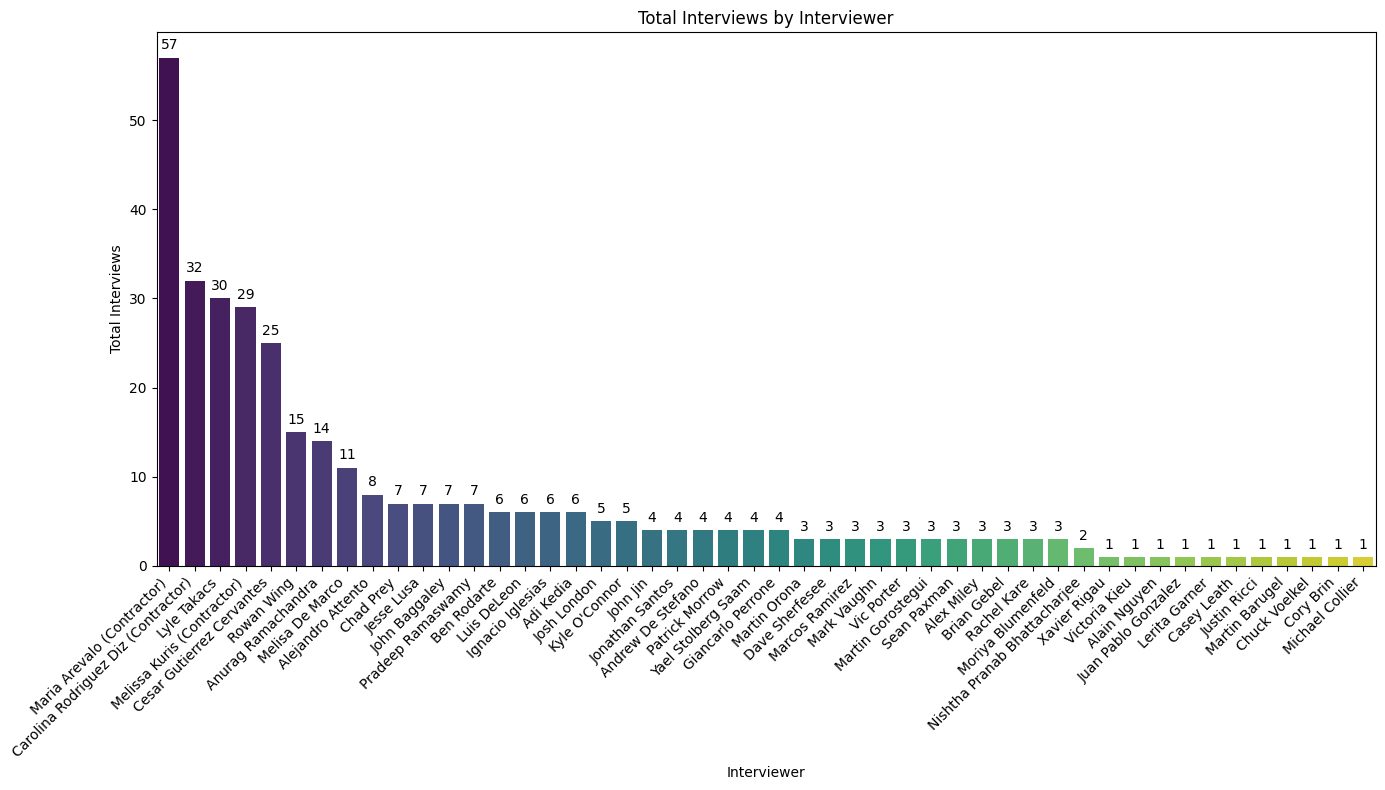

In [8]:
# Crear un gráfico de barras para visualizar el total de entrevistas por entrevistador
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Interviewer', y='Total Interviews', data=total_interviews_by_interviewer, palette='viridis')
plt.title("Total Interviews by Interviewer")
plt.xlabel("Interviewer")
plt.ylabel("Total Interviews")
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas con la cantidad exacta de entrevistas
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

/var/folders/5n/nhlty2pd5q96xfw8z_1stsnm0000gn/T/ipykernel_78278/8979467.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Outcome', y='Count', data=outcome_counts, palette='viridis')


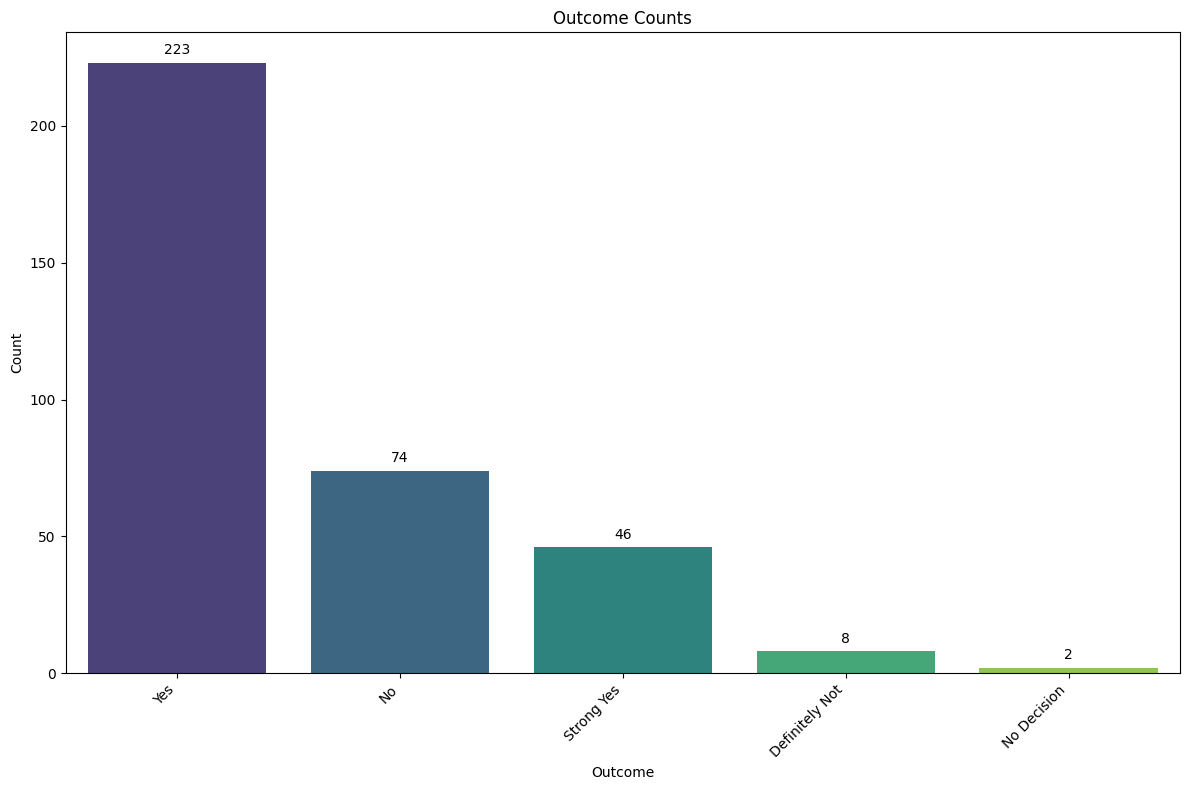

In [ ]:
outcome_counts = dfQ32024['Outcome'].value_counts().reset_index()
outcome_counts.columns = ['Outcome', 'Count']

# Mostrar los resultados
outcome_counts
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Outcome', y='Count', data=outcome_counts, palette='viridis')
plt.title("Outcome Counts")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas con la cantidad exacta
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [10]:
# Filtrar los datos para incluir solo los Outcomes 'No', 'No Decision', y 'Definitely Not'
filtered_outcomes = dfQ32024[dfQ32024['Outcome'].isin(['No', 'No Decision', 'Definitely Not'])]
# Agrupar por 'Interviewer' y contar las respuestas negativas
interviewer_negative_counts = filtered_outcomes.groupby('Interviewer').size().reset_index(name='Count')

# Ordenar por la cantidad de respuestas negativas en orden descendente
top_negative_interviewer = interviewer_negative_counts.sort_values(by='Count', ascending=False).iloc[0]

# Mostrar el entrevistador que más respondió con las opciones negativas
print(f"The interviewer who responded the most with 'No', 'No Decision', or 'Definitely Not' is: {top_negative_interviewer['Interviewer']} with {top_negative_interviewer['Count']} responses.")


The interviewer who responded the most with 'No', 'No Decision', or 'Definitely Not' is: Melissa Kuris (Contractor) with 13 responses.


╒════╤══════════════════════════════╤═════════╕
│    │ Interviewer                  │   Count │
╞════╪══════════════════════════════╪═════════╡
│ 22 │ Melissa Kuris (Contractor)   │      13 │
├────┼──────────────────────────────┼─────────┤
│  7 │ Cesar Gutierrez Cervantes    │       8 │
├────┼──────────────────────────────┼─────────┤
│ 11 │ Jesse Lusa                   │       6 │
├────┼──────────────────────────────┼─────────┤
│ 21 │ Melisa De Marco              │       5 │
├────┼──────────────────────────────┼─────────┤
│ 26 │ Pradeep Ramaswamy            │       5 │
├────┼──────────────────────────────┼─────────┤
│  4 │ Anurag Ramachandra           │       4 │
├────┼──────────────────────────────┼─────────┤
│  8 │ Chad Prey                    │       4 │
├────┼──────────────────────────────┼─────────┤
│ 18 │ Maria Arevalo (Contractor)   │       3 │
├────┼──────────────────────────────┼─────────┤
│ 16 │ Lyle Takacs                  │       3 │
├────┼──────────────────────────────┼───

/var/folders/5n/nhlty2pd5q96xfw8z_1stsnm0000gn/T/ipykernel_78278/990854978.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Interviewer', y='Count', data=interviewer_negative_ranking, palette='viridis')


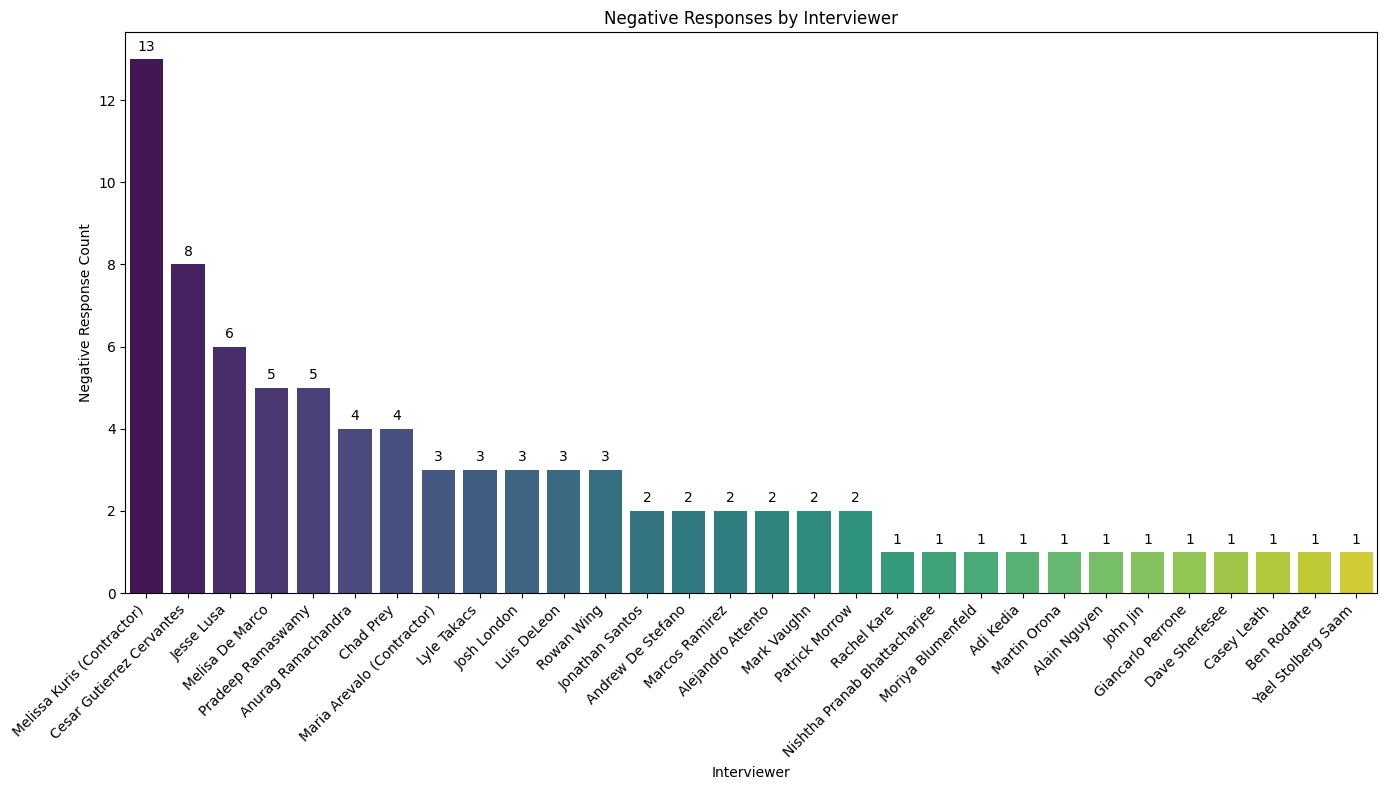

In [11]:
# Ordenar la tabla de entrevistadores con respuestas negativas de mayor a menor
interviewer_negative_ranking = interviewer_negative_counts.sort_values(by='Count', ascending=False)

# Mostrar la tabla con el ranking
from tabulate import tabulate
print(tabulate(interviewer_negative_ranking, headers='keys', tablefmt='fancy_grid'))
# Crear un gráfico de barras para visualizar la cantidad de respuestas negativas por entrevistador
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Interviewer', y='Count', data=interviewer_negative_ranking, palette='viridis')
plt.title("Negative Responses by Interviewer")
plt.xlabel("Interviewer")
plt.ylabel("Negative Response Count")
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas con la cantidad exacta de respuestas negativas
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()


╒════╤══════════════════════════════╤═══════════════════════╤═════════╕
│    │ Interviewer                  │ Stage                 │   Count │
╞════╪══════════════════════════════╪═══════════════════════╪═════════╡
│ 27 │ Melissa Kuris (Contractor)   │ Recruiter Screen      │      13 │
├────┼──────────────────────────────┼───────────────────────┼─────────┤
│ 13 │ Jesse Lusa                   │ Panel Team Interview  │       6 │
├────┼──────────────────────────────┼───────────────────────┼─────────┤
│ 26 │ Melisa De Marco              │ 1st Round Interview   │       5 │
├────┼──────────────────────────────┼───────────────────────┼─────────┤
│  4 │ Anurag Ramachandra           │ Hiring Manager Screen │       4 │
├────┼──────────────────────────────┼───────────────────────┼─────────┤
│  7 │ Cesar Gutierrez Cervantes    │ Assessment            │       4 │
├────┼──────────────────────────────┼───────────────────────┼─────────┤
│  8 │ Cesar Gutierrez Cervantes    │ Panel Team Interview  │   

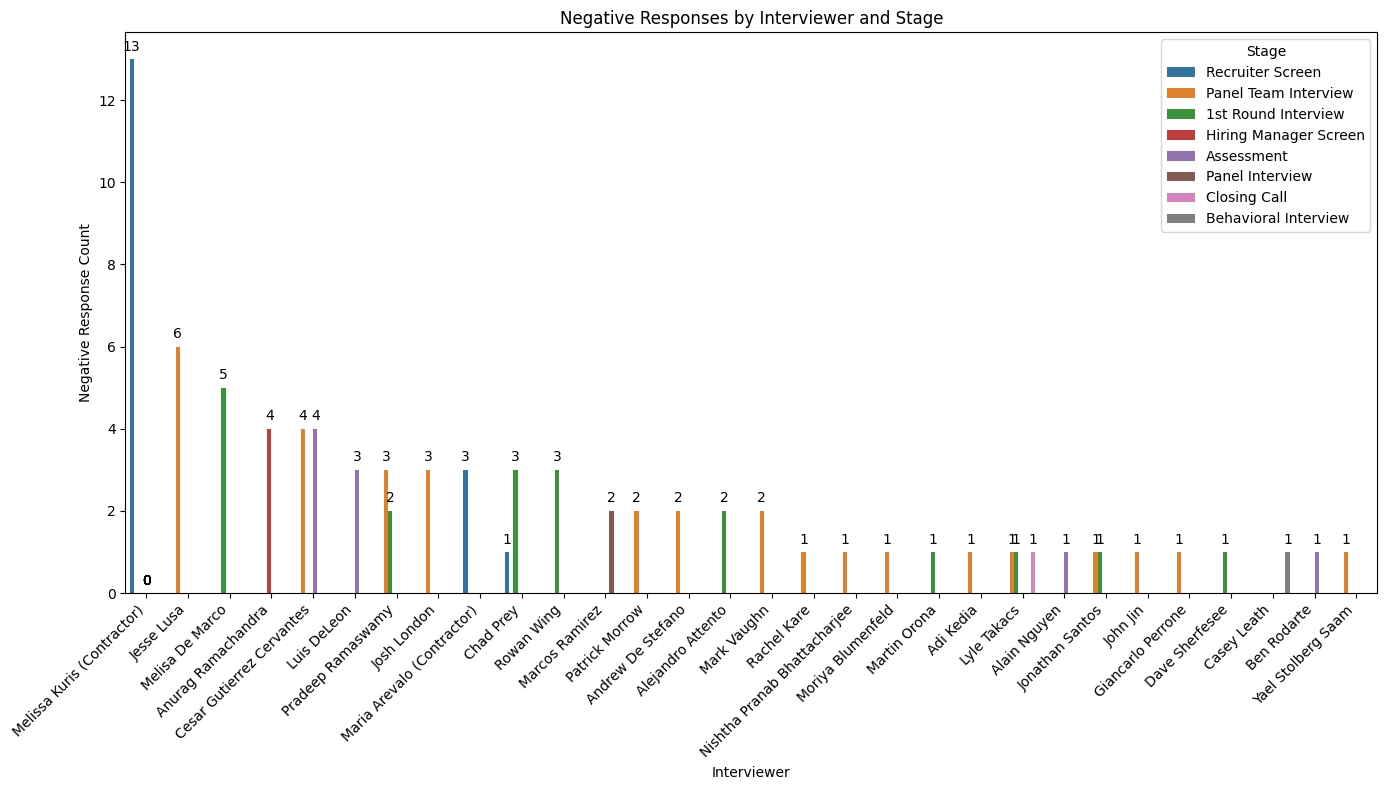

In [15]:
# Agrupar por 'Interviewer', 'Stage', y contar las respuestas negativas
interviewer_stage_negative_counts = filtered_outcomes.groupby(['Interviewer', 'Stage']).size().reset_index(name='Count')

# Ordenar por la cantidad de respuestas negativas en orden descendente
interviewer_stage_negative_ranking = interviewer_stage_negative_counts.sort_values(by='Count', ascending=False)

# Mostrar la tabla con el ranking
print(tabulate(interviewer_stage_negative_ranking, headers='keys', tablefmt='fancy_grid'))

# Crear un gráfico de barras para visualizar la cantidad de respuestas negativas por entrevistador y etapa
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Interviewer', y='Count', hue='Stage', data=interviewer_stage_negative_ranking, palette='tab10')
plt.title("Negative Responses by Interviewer and Stage")
plt.xlabel("Interviewer")
plt.ylabel("Negative Response Count")
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas con la cantidad exacta de respuestas negativas
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

╒════╤═══════════════════════════════════════════════════════════════╤═════════╕
│    │ Job                                                           │   Count │
╞════╪═══════════════════════════════════════════════════════════════╪═════════╡
│  5 │ Senior Frontend Engineer (Incubation) LATAM                   │      30 │
├────┼───────────────────────────────────────────────────────────────┼─────────┤
│  1 │ Senior Data Engineer LATAM                                    │      13 │
├────┼───────────────────────────────────────────────────────────────┼─────────┤
│  0 │ Senior Backend Engineer (Incubation)- LATAM                   │       9 │
├────┼───────────────────────────────────────────────────────────────┼─────────┤
│  2 │ Senior Data Scientist LATAM                                   │       9 │
├────┼───────────────────────────────────────────────────────────────┼─────────┤
│  3 │ Senior Developer Experience Engineer (Infrastructure) - LATAM │       7 │
├────┼──────────────────────

/var/folders/5n/nhlty2pd5q96xfw8z_1stsnm0000gn/T/ipykernel_78278/3082796864.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Job', y='Count', data=job_negative_counts_sorted, palette='viridis')


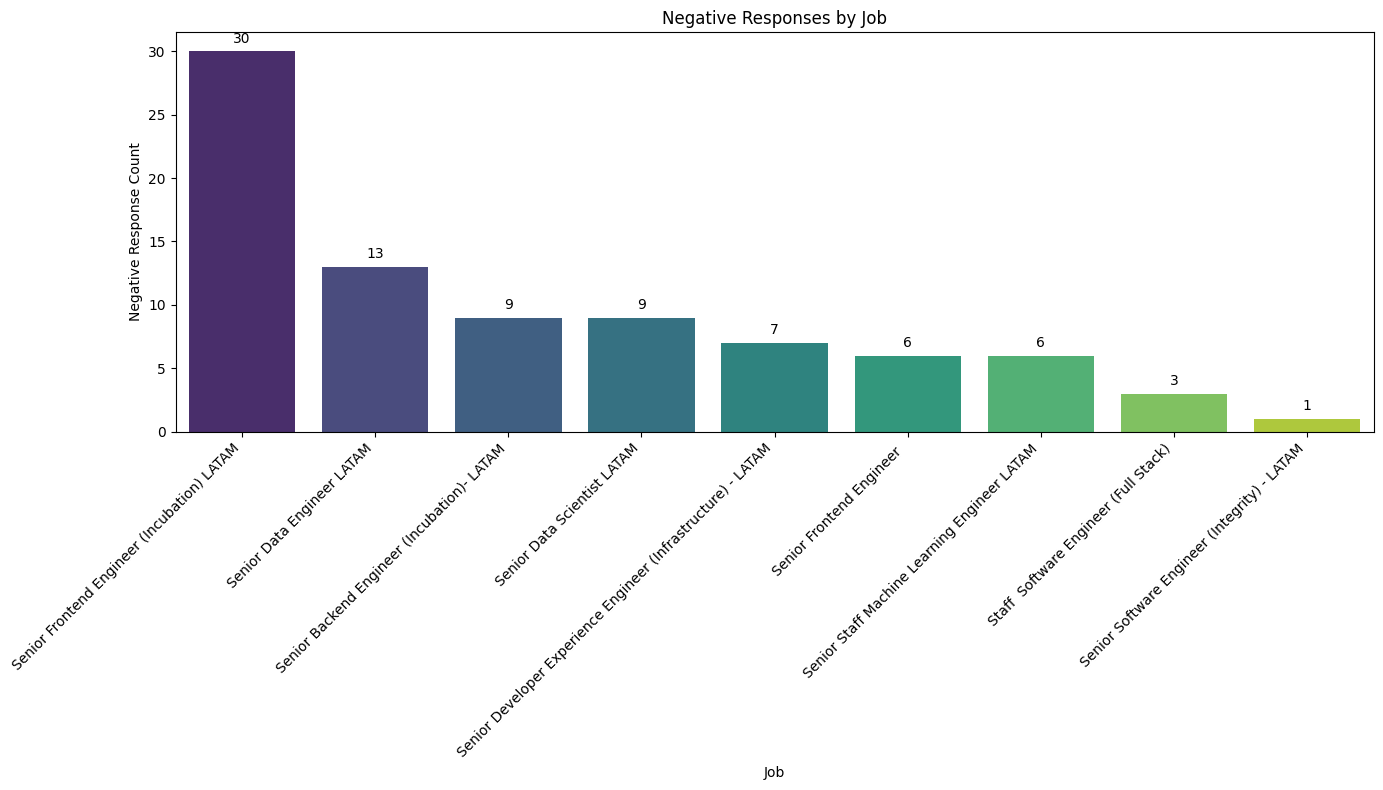

In [16]:
# Agrupar por 'Job' y contar las respuestas negativas
job_negative_counts = filtered_outcomes.groupby('Job').size().reset_index(name='Count')

# Ordenar por la cantidad de respuestas negativas en orden descendente
job_negative_counts_sorted = job_negative_counts.sort_values(by='Count', ascending=False)

# Mostrar la tabla con los resultados
print(tabulate(job_negative_counts_sorted, headers='keys', tablefmt='fancy_grid'))
# Crear un gráfico de barras para visualizar la cantidad de respuestas negativas por trabajo
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Job', y='Count', data=job_negative_counts_sorted, palette='viridis')
plt.title("Negative Responses by Job")
plt.xlabel("Job")
plt.ylabel("Negative Response Count")
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas con la cantidad exacta de respuestas negativas
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()